# Titanic Survival Prediction

### Variable Notes
#### pclass: A proxy for socio-economic status (SES)
##### - 1st = Upper
##### - 2nd = Middle
##### - 3rd = Lower
#### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
#### sibsp: The dataset defines family relations in this way...
##### - Sibling = brother, sister, stepbrother, stepsister
##### - Spouse = husband, wife (mistresses and fiancés were ignored)
#### parch: The dataset defines family relations in this way...
##### - Parent = mother, father
##### - Child = daughter, son, stepdaughter, stepson
##### Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

# Survived = 1, Did no Survive = 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Explore Data

In [109]:
test_df.info() # Age, Fare , Embarked (in train_df) & Cabin contain NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## Age and Fare distributions

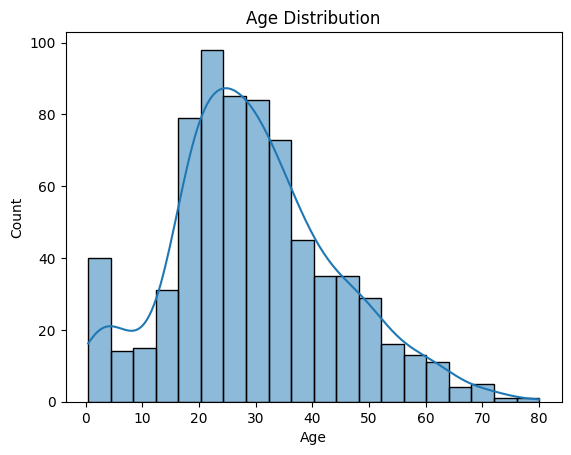

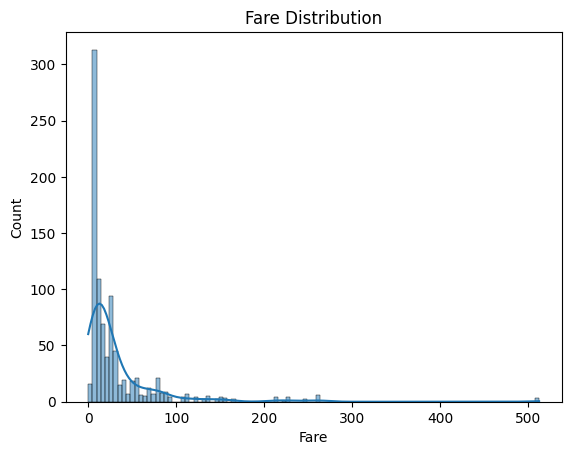

In [20]:
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(train_df['Fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()


In [21]:
print("Age skewness:", train_df['Age'].skew()) # minimal skewness but will use median to handle outliers
print("Fare skewness:", train_df['Fare'].skew()) # extremely high and confirms strong skewness better to use median

Age skewness: 0.38910778230082704
Fare skewness: 4.787316519674893


In [22]:
print(train_df.describe())
print(train_df['Embarked'].value_counts())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Data visualisation

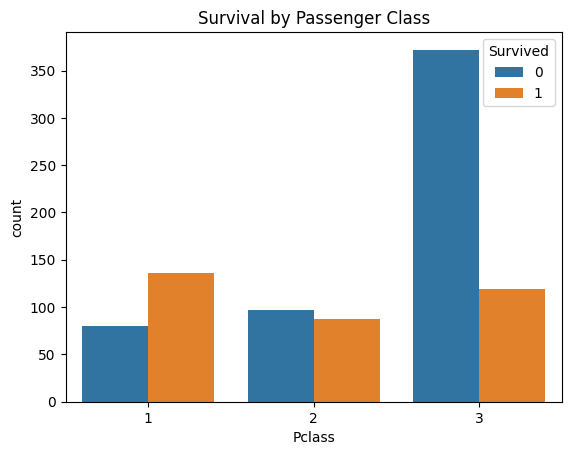

In [30]:
# Survival by Passenger Class
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# This suggests that higher-class passengers (likely wealthier) had better access to lifeboats or rescue efforts

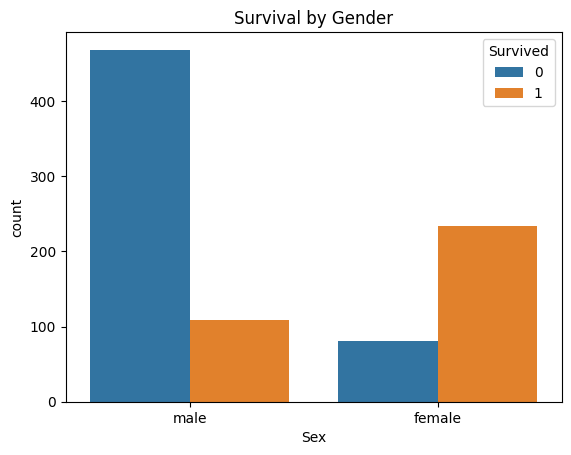

In [31]:
# Survival by Gender
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# This supports the idea that women were given priority in rescue efforts

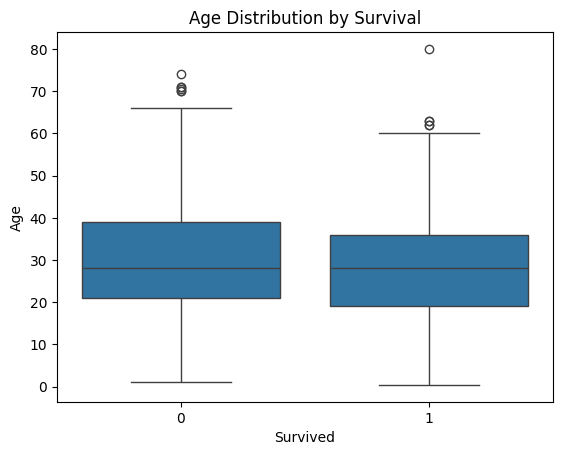

In [32]:
# Age distribution by Survival
sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.show()

# The boxplot shows that survivors (1) had a slightly wider range of ages, with a slight concentration of younger passengers
# Younger passengers (eg. children) appear to have a better chance of survival, possibly due to the "women and children first" policy
# There are some outliers among older survivors but survival doesn’t seem significantly dependent on age

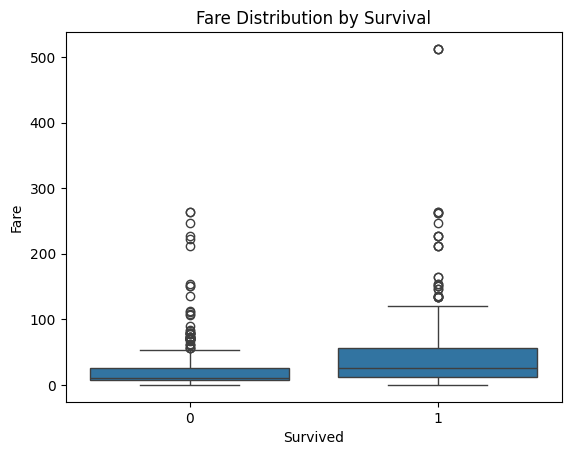

In [34]:
# Fare distribution and Survival
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.show()

# Survivors paid higher fares on average, as seen in the boxplot.
# Suggests that passengers in higher-paying cabins (likely higher Pclass) had better survival rates.
# There are significant outliers among survivors who paid very high fares

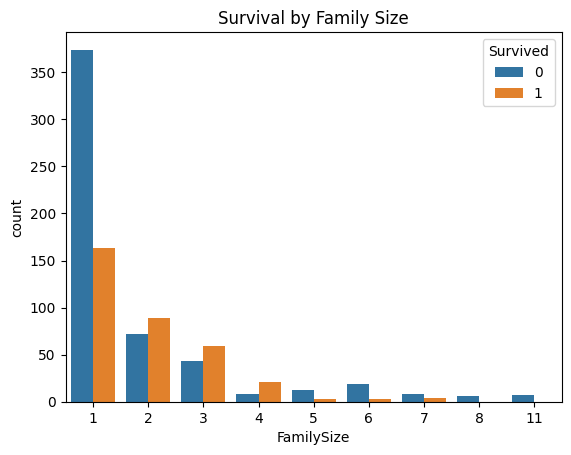

In [35]:
# Combine SibSp and Parch into a new feature FamilySize
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
sns.countplot(data=train_df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.show()

# Small families (FamilySize 2-4) had higher survival rates
# Solo travellers and large families had lower survival rates

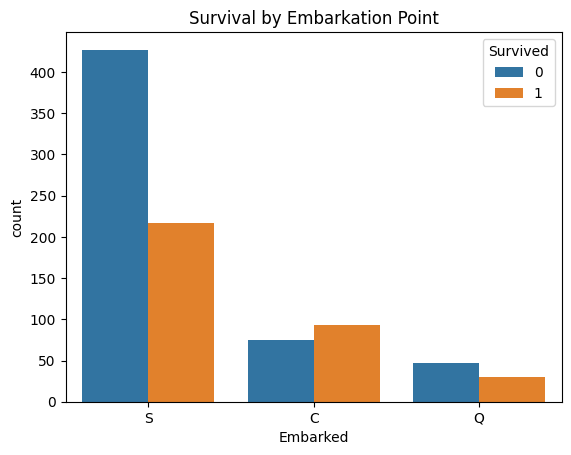

In [36]:
# Embarkment point and survival
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Point')
plt.show()

# Passengers who embarked from Cherbourg (C) had the highest survival rate
# Passengers from Southampton (S) had the lowest survival rate
# Could be linked to the differences in class distribution among embarkation points (eg. more 1st-class passengers from Cherbourg)

# Data Cleaning

In [5]:
# Fill missing Age and Fare values with median
age_median = train_df['Age'].median()
fare_median = train_df['Fare'].median()

train_df['Age'] = train_df['Age'].fillna(age_median)
test_df['Age'] = test_df['Age'].fillna(age_median)

train_df['Fare'] = train_df['Fare'].fillna(fare_median)
test_df['Fare'] = test_df['Fare'].fillna(fare_median)

# Fill missing Embarked values with mode
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)
test_df['Embarked'] = test_df['Embarked'].fillna(embarked_mode)

passenger_ids = test_df['PassengerId']

# Drop Cabin and irrelevant features
train_df = train_df.drop(columns=['Cabin', 'Ticket', 'PassengerId'])
test_df = test_df.drop(columns=['Cabin', 'Ticket', 'PassengerId'])

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# Normalize Fare
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df['Fare'] = scaler.fit_transform(train_df[['Fare']])
test_df['Fare'] = scaler.transform(test_df[['Fare']])

print(type(test_df))
test_df.head(5)

<class 'pandas.core.frame.DataFrame'>


,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.5,0,0,-0.490783,True,True,False
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,-0.507479,False,False,True
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,-0.453367,True,True,False
3,3,"Wirz, Mr. Albert",27.0,0,0,-0.474005,True,False,True
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,-0.401017,False,False,True


# Feature Engineering

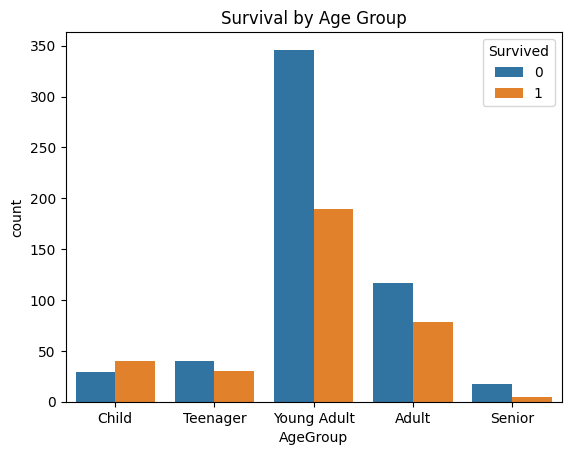

<class 'pandas.core.frame.DataFrame'>


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,FareBin,WealthIndex,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,0,0,-0.490783,True,True,False,1,1,False,True,False,False,1,-0.163594,False,True,False,False
1,3,47.0,1,0,-0.507479,False,False,True,2,0,False,False,True,False,1,-0.169160,False,False,True,False
2,2,62.0,0,0,-0.453367,True,True,False,1,1,False,False,False,True,2,-0.226683,False,True,False,False
3,3,27.0,0,0,-0.474005,True,False,True,1,1,False,True,False,False,2,-0.158002,False,True,False,False
4,3,22.0,1,1,-0.401017,False,False,True,3,0,False,True,False,False,2,-0.133672,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,-0.486337,True,False,True,1,1,False,True,False,False,2,-0.162112,False,True,False,False
414,1,39.0,0,0,1.544246,False,False,False,1,1,False,False,True,False,4,1.544246,False,False,False,True
415,3,38.5,0,0,-0.502445,True,False,True,1,1,False,False,True,False,1,-0.167482,False,True,False,False
416,3,28.0,0,0,-0.486337,True,False,True,1,1,False,True,False,False,2,-0.162112,False,True,False,False


In [6]:
# Passengers themselves are also part of "family size" so add 1 to sum
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Binary feature to indicate whether passenger was travelling alone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

# Group ages into bins to capture non-linear relationships between age & survival
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)

# Check if binning age shows significance
sns.countplot(data=train_df, x='AgeGroup', hue='Survived')
plt.title('Survival by Age Group')
plt.show()


# Encode AgeGroup as dummy variables
train_df = pd.get_dummies(train_df, columns=['AgeGroup'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['AgeGroup'], drop_first=True)
# As the plot shows diff age groups have different survival probabilities (e.g., children prioritized in rescue efforts)

# Bin Fare
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4, labels=[1, 2, 3, 4])
test_df['FareBin'] = pd.qcut(test_df['Fare'], 4, labels=[1, 2, 3, 4])

# Create a WealthIndex by combining Pclass and Fare to capture socioeconomic status
train_df['WealthIndex'] = train_df['Fare'] / train_df['Pclass']
test_df['WealthIndex'] = test_df['Fare'] / test_df['Pclass']

# Extract titles from the Name column using raw strings to get social status
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Map uncommon titles to 'Other' and reduce categories
title_mapping = {'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master'}
train_df['Title'] = train_df['Title'].map(lambda x: title_mapping.get(x, 'Other'))
test_df['Title'] = test_df['Title'].map(lambda x: title_mapping.get(x, 'Other'))

# Encode Title as dummy variables
train_df = pd.get_dummies(train_df, columns=['Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Title'], drop_first=True)

# Drop 'Name' col, no longer needed
train_df = train_df.drop(columns=['Name'], errors='ignore')
test_df = test_df.drop(columns=['Name'], errors='ignore')

print(type(test_df))
test_df


# Checks

In [7]:
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Reorder test_df columns to match train_df
test_df = test_df[train_df.columns.drop('Survived')]

<class 'pandas.core.frame.DataFrame'>


In [8]:
print("Train FareBin unique values:", train_df['FareBin'].unique())
print("Test FareBin unique values:", test_df['FareBin'].unique())

# Check FareBin is consisten in both dfs

Train FareBin unique values: [1, 4, 2, 3]
Categories (4, int64): [1 < 2 < 3 < 4]
Test FareBin unique values: [1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]


# Modelling

In [9]:
# Split Data for Training and Validation
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['Survived'])  # Features
y = train_df['Survived']                # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.8324022346368715


In [11]:
# Download predictions for Random Forest
predictions = model.predict(test_df)

# Create csv file
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})
submission.to_csv('Titanic_submission.csv', index=False)

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [19]:
feature_names = X.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_df = scaler.transform(test_df)

# Feature importance
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
logreg_best = grid_search.best_estimator_

y_pred = logreg_best.predict(X_val)
print("Tuned Validation Accuracy:", accuracy_score(y_val, y_pred))

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_best.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


Best Parameters: {'C': 10}
Tuned Validation Accuracy: 0.8156424581005587
                 Feature  Coefficient
4                   Fare     1.063309
14               FareBin     0.036455
6             Embarked_Q    -0.039077
1                    Age    -0.069423
13       AgeGroup_Senior    -0.131662
9                IsAlone    -0.150348
7             Embarked_S    -0.203551
3                  Parch    -0.216154
10     AgeGroup_Teenager    -0.293942
11  AgeGroup_Young Adult    -0.372100
8             FamilySize    -0.448585
12        AgeGroup_Adult    -0.455353
19           Title_Other    -0.490684
2                  SibSp    -0.496116
0                 Pclass    -0.618064
15           WealthIndex    -0.774443
18             Title_Mrs    -0.981881
17              Title_Mr    -1.525859
16            Title_Miss    -1.613935
5               Sex_male    -1.782354


##  Support Vector Machine

In [14]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42, C=1)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
print("SVM Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

SVM Validation Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## XGBoost

In [15]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

XGBoost Validation Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_val)
print("kNN Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


kNN Validation Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

